<a href="https://colab.research.google.com/github/zawemi/ZUM/blob/main/Image_description_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA and inferencing (3 points)

Install `transformers` via `pip`

In [1]:
###
#YOUR CODE
###
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.5 MB/s eta 0:00:00


Import necessery libraries:</br> `requests`,</br> `Image` (from `PIL`)</br> and `GPT2TokenizerFast`, `ViTImageProcessor`, `VisionEncoderDecoderModel` from `transformers`</br>
More about the model: https://huggingface.co/nlpconnect/vit-gpt2-image-captioning

In [2]:
###
#YOUR CODE
###
import requests
from PIL import Image
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel

Load fine-tuned Huggingface model from `"nlpconnect/vit-gpt2-image-captioning"`, use `.from_pretrained`,</br> load text tokenizer (`GPT2TokenizerFast`)</br> and image tokenizer (`ViTImageProcessor`).

In [3]:
###
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
###

Download images from COCO Dataset, unzip it.</br>
Images: http://images.cocodataset.org/zips/val2014.zip</br>
Descriptions: http://images.cocodataset.org/annotations/annotations_trainval2014.zip</br>
You can use `!wget` to do this


In [4]:
###
#YOUR CODE
###
!wget http://images.cocodataset.org/zips/val2014.zip
!wget  http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2023-05-26 13:18:32--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.152.28, 52.216.143.68, 52.217.160.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.152.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  44.7MB/s    in 2m 4s   

2023-05-26 13:20:36 (51.2 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]

--2023-05-26 13:20:36--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.11.141, 3.5.21.112, 52.217.114.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.11.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100

`!unzip` files

In [5]:
###
#YOUR CODE
###
!unzip val2014.zip
!unzip annotations_trainval2014.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.jpg  
 extracting: val2014/COCO_val2014_000000564166.jpg  
 extracting: val2014/COCO_val2014_000000323327.jpg  
 extracting: val2014/COCO_val2014_000000338581.jpg  
 extracting: val2014/COCO_val2014_000000039656.jpg  
 extracting: val2014/COCO_val2014_000000071667.jpg  
 extracting: val2014/COCO_val2014_000000376046.jpg  
 extracting: val2014/COCO_val2014_

Display random image and find its description in /content/annotations/captions_val2014.json file.</br> `os` and `json` libraries might be useful

COCO_val2014_000000269689.jpg


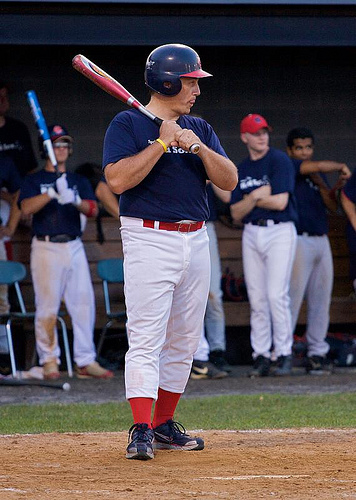

In [6]:
###
#YOUR CODE
###
import os
import numpy as np
images = os.listdir('val2014')
random_img = images[np.random.randint(0, len(images)+1)]
print(random_img)
img = Image.open(f'val2014/{random_img}')
img.show()

In [7]:
img_id = random_img.replace('COCO_val2014_', '')
img_id = img_id.replace('.jpg', '')
img_id = img_id.lstrip('0')
img_id = int(img_id)
img_id

269689

In [8]:
###
#YOUR CODE
###
import json
with open('annotations/captions_val2014.json', "r") as read_file:
    annotations = json.load(read_file)
annotations

{'info': {'description': 'COCO 2014 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'images': [{'license': 3,
   'file_name': 'COCO_val2014_000000391895.jpg',
   'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
   'height': 360,
   'width': 640,
   'date_captured': '2013-11-14 11:18:45',
   'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
   'id': 391895},
  {'license': 4,
   'file_name': 'COCO_val2014_000000522418.jpg',
   'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 11:38:44',
   'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
   'id': 522418},
  {'license': 3,
   'file_name': 'COCO_val2014_000000184613.jpg',
   'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000184613.

In [9]:
type(annotations)

dict

In [10]:
annotations.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [11]:
annotations['annotations']

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'},
 {'image_id': 322141,
  'id': 49,
  'caption': 'A room with blue walls and a white sink and door.'},
 {'image_id': 16977,
  'id': 89,
  'caption': 'A car that seems to be parked illegally behind a legally parked car'},
 {'image_id': 106140,
  'id': 98,
  'caption': 'A large passenger airplane flying through the air.'},
 {'image_id': 106140,
  'id': 101,
  'caption': 'There is a GOL plane taking off in a partly cloudy sky.'},
 {'image_id': 322141,
  'id': 109,
  'caption': 'Blue and white color scheme in a small bathroom.'},
 {'image_id': 322141,
  'id': 121,
  'caption': 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.'},
 {'image_id': 322141,
  'id': 163,
  'caption': 'A blue boat themed bathroom with a life preserver on the wall'},
 {'image_id': 203

In [12]:
[desc for desc in annotations['annotations'] if desc['image_id']==img_id]

[{'image_id': 269689,
  'id': 643517,
  'caption': 'A group of men on a field with baseball bats.'},
 {'image_id': 269689,
  'id': 645521,
  'caption': 'Baseball player holding bat on the field and other players in dugout behind him.'},
 {'image_id': 269689,
  'id': 646988,
  'caption': 'A baseball player is getting ready to hit a ball.  '},
 {'image_id': 269689,
  'id': 647900,
  'caption': 'A baseball player in a blue and white uniform holding a baseball bat.'},
 {'image_id': 269689,
  'id': 648686,
  'caption': 'A baseball player is awaiting his turn at bat.'}]

Choose 20 images at random 

In [13]:
###
#YOUR CODE
###
random_images_20 = np.random.choice(images, 20, replace=False)
random_images_20

array(['COCO_val2014_000000321064.jpg', 'COCO_val2014_000000065170.jpg',
       'COCO_val2014_000000308476.jpg', 'COCO_val2014_000000134042.jpg',
       'COCO_val2014_000000199575.jpg', 'COCO_val2014_000000476715.jpg',
       'COCO_val2014_000000456127.jpg', 'COCO_val2014_000000374677.jpg',
       'COCO_val2014_000000200739.jpg', 'COCO_val2014_000000001700.jpg',
       'COCO_val2014_000000010707.jpg', 'COCO_val2014_000000460676.jpg',
       'COCO_val2014_000000576607.jpg', 'COCO_val2014_000000048268.jpg',
       'COCO_val2014_000000373793.jpg', 'COCO_val2014_000000329304.jpg',
       'COCO_val2014_000000086696.jpg', 'COCO_val2014_000000227230.jpg',
       'COCO_val2014_000000416343.jpg', 'COCO_val2014_000000390298.jpg'],
      dtype='<U29')

Find their descriptions.

In [15]:
###
##YOUR CODE
###
all_references = {}
for random_img in random_images_20:
  img_id = random_img.replace('COCO_val2014_', '')
  img_id = img_id.replace('.jpg', '')
  img_id = img_id.lstrip('0')
  img_id = int(img_id)
  img_references = []
  [img_references.append(desc['caption']) for desc in annotations['annotations'] if desc['image_id']==img_id]
  all_references.update({img_id : img_references})
print(all_references)

{321064: ['A small wooden table covered with delicious vegetables. ', 'A dining table with a bowl of garlic cloves.', 'A kitchen table with a juicer and vegetable on it.', 'A kitchen table with vegetables and food processor.', 'A food processor sit on a small table in a kitchen next to fresh vegetables and a colander of mushrooms.'], 65170: ['A woman is sitting on a bench in front of the water.', 'A woman is on a bench near the water.', 'A pretty young lady sitting on top of a bench.', 'a woman is sitting out on a bench', 'A woman sits on a bench facing the water.'], 308476: ['A polar bear standing on a rock formation in an enclosure.', 'a white bear is standing out on the rocks', 'A large white bear standing near a rock.', 'A polar bear walking on the rocks near a fence.', 'Polar bear licking rock near ball and fence.'], 134042: ['A passenger jet aircraft flying in the sky.', 'High flying jet plane as seen from ground on cloudy day.', 'A large let flying through a  cloudy blue sky.', 

Perform inference on them:
* open image (e.g. `Image.open`)
* preprocess it with `image_processor` (with `return_tensors="pt"`) and get pixel values by `.pixel_values`
* inference model by `model.generate`
* decode generated ids using tokenizer (`tokenizer.batch_decode`), skip special tokens (`skip_special_tokens=True`)

In [16]:
###
#YOUR CODE
###
###
##YOUR CODE
###
all_descriptions = {}
for random_img in random_images_20:
  img_id = random_img.replace('COCO_val2014_', '')
  img_id = img_id.replace('.jpg', '')
  img_id = img_id.lstrip('0')
  img_id = int(img_id)
  img_description = []
  img = Image.open(f'val2014/{random_img}')
  preproc_img = image_processor.preprocess(img, return_tensors = 'pt')
  model_img = model.generate(preproc_img.pixel_values)
  decode_img = tokenizer.batch_decode(model_img, skip_special_tokens = True)
  all_descriptions.update({img_id : decode_img})
print(all_descriptions)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{321064: ['a kitchen table with a bowl of vegetables and a salad '], 65170: ['a woman sitting on a bench near the water '], 308476: ['a polar bear standing on a rock in a zoo enclosure '], 134042: ['a plane flying in the sky with a cloud '], 199575: ['a dog is standing in a kitchen with a counter '], 476715: ['a bathroom with a toilet and a shower stall '], 456127: ['a statue of a woman sitting on a bench '], 374677: ['a vase with flowers in it on a table '], 200739: ['a horse drawn carriage on a street '], 1700: ['a young boy riding a snowboard on top of a snow covered slope '], 10707: ['two men are playing a video game together '], 460676: ['a man and a child playing tennis on a court '], 576607: ['a woman sitting on a bench in front of a fence '], 48268: ['a herd of zebras grazing in a field '], 373793: ['a bathroom with a toilet, shower, and sink '], 329304: ['two young men are skateboarding on a sidewalk '], 86696: ['a kitchen with a tv and a refrigerator '], 227230: ['a man is wi

##BLEU (1 point)

Calculate BLEU score:</br>
* https://pl.wikipedia.org/wiki/BLEU
* https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
</br> reference sentence = description from dataset,</br> candidate = description generated by the model

Import `sentence_bleu` from `nltk.translate.bleu_score`.</br>
You can use `.spilt()` to split the descriptions.

In [21]:
all_references[321064]

['A small wooden table covered with delicious vegetables. ',
 'A dining table with a bowl of garlic cloves.',
 'A kitchen table with a juicer and vegetable on it.',
 'A kitchen table with vegetables and food processor.',
 'A food processor sit on a small table in a kitchen next to fresh vegetables and a colander of mushrooms.']

In [24]:
img_references = all_references[321064]

In [25]:
[x.split() for x in img_references]

[['A',
  'small',
  'wooden',
  'table',
  'covered',
  'with',
  'delicious',
  'vegetables.'],
 ['A', 'dining', 'table', 'with', 'a', 'bowl', 'of', 'garlic', 'cloves.'],
 ['A',
  'kitchen',
  'table',
  'with',
  'a',
  'juicer',
  'and',
  'vegetable',
  'on',
  'it.'],
 ['A', 'kitchen', 'table', 'with', 'vegetables', 'and', 'food', 'processor.'],
 ['A',
  'food',
  'processor',
  'sit',
  'on',
  'a',
  'small',
  'table',
  'in',
  'a',
  'kitchen',
  'next',
  'to',
  'fresh',
  'vegetables',
  'and',
  'a',
  'colander',
  'of',
  'mushrooms.']]

In [28]:
###
#YOUR COD
from nltk.translate.bleu_score import sentence_bleu
for random_img in random_images_20:
  img_id = random_img.replace('COCO_val2014_', '')
  img_id = img_id.replace('.jpg', '')
  img_id = img_id.lstrip('0')
  img_id = int(img_id)
  img_references = all_references[img_id]
  img_references = [x.split() for x in img_references]
  score = sentence_bleu(img_references, all_descriptions[img_id][0].split())
  print(img_id, "score:", score)

321064 score: 0.6238986072117501
65170 score: 0.6606328636027614
308476 score: 0.47987820666906633
134042 score: 4.797597231912944e-78
199575 score: 0.48109772909788073
476715 score: 9.905379076004965e-155
456127 score: 1.0
374677 score: 9.53091075863908e-155
200739 score: 0.38185022210613584
1700 score: 0.5676721706387805
10707 score: 0.3628241434631103
460676 score: 0.5169731539571706
576607 score: 3.8719283242189536e-78
48268 score: 5.572079302093865e-78
373793 score: 7.803659209895733e-78
329304 score: 6.484592771860512e-155
86696 score: 0.5247357977607321
227230 score: 3.8900070566041115e-78
416343 score: 9.905379076004965e-155
390298 score: 0.4674031711235234


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [29]:
for random_img in random_images_20:
  img_id = random_img.replace('COCO_val2014_', '')
  img_id = img_id.replace('.jpg', '')
  img_id = img_id.lstrip('0')
  img_id = int(img_id)
  img_references = all_references[img_id]
  img_references = [x.split() for x in img_references]
  score = sentence_bleu(img_references, all_descriptions[img_id][0].split(), weights=(1, 0, 0, 0))
  print(img_id, "score:", score)

321064 score: 0.9090909090909091
65170 score: 0.8888888888888888
308476 score: 0.6363636363636364
134042 score: 0.6666666666666666
199575 score: 0.9
476715 score: 0.7777777777777778
456127 score: 1.0
374677 score: 0.6666666666666666
200739 score: 0.7514772930752859
1700 score: 0.8461538461538461
10707 score: 0.6618726769384466
460676 score: 1.0
576607 score: 0.45454545454545453
48268 score: 0.6618726769384466
373793 score: 0.875
329304 score: 0.25
86696 score: 0.772184789761521
227230 score: 0.558376335026619
416343 score: 0.7777777777777778
390298 score: 0.8181818181818182


##Gradio (1 point)

Install gradio via `!pip`.</br>
Have a quick look at the tutorial: https://gradio.app/quickstart/

In [30]:
###
#YOUR CODE
###
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 

Import gradio

In [31]:
###
#YOUR CODE
###
import gradio

If you didn't done it before, create a function for describing provided image.

In [34]:
###
#YOUR CODE
###

def describe_image(img_filename):
  img = Image.open(f'val2014/{img_filename}')
  preproc_img = image_processor.preprocess(img, return_tensors = 'pt')
  model_img = model.generate(preproc_img.pixel_values)
  decode_img = tokenizer.batch_decode(model_img, skip_special_tokens = True)
  return decode_img

In [35]:
describe_image(images[10])

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['a fire hydrant on a sidewalk with a fence ']

In [38]:
images[10]

'COCO_val2014_000000138550.jpg'

Make an UI with `gradio.Interface`

In [37]:
###
#YOUR CODE
###

demo = gradio.Interface(fn=describe_image, inputs="text", outputs="text")
demo.launch() 

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>